**Library Imports**

In [9]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *
from tqdm import tqdm
import math
import random
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import seaborn as sns
# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

In [10]:
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# set plot style
sns.set()

**Importing Files**

In [12]:
import io
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

**Data Statistics**

In [13]:
# look at data statistics
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [14]:
# look at All columns in tthe train data
df_train.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

In [15]:
# look at the sum of data observations
df_train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [16]:
# check for null values in the columns
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [17]:
# Merge train and test data to easily clean and split data 
df = pd.concat([df_train, df_test])
df.head

<bound method NDFrame.head of        sentiment                                            message  tweetid
0            1.0  PolySciMajor EPA chief doesn't think carbon di...   625221
1            1.0  It's not like we lack evidence of anthropogeni...   126103
2            2.0  RT @RawStory: Researchers say we have three ye...   698562
3            1.0  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4            1.0  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954
...          ...                                                ...      ...
10541        NaN  RT @BrittanyBohrer: Brb, writing a poem about ...   895714
10542        NaN  2016: the year climate change came home: Durin...   875167
10543        NaN  RT @loop_vanuatu: Pacific countries positive a...    78329
10544        NaN  RT @xanria_00018: You’re so hot, you must be t...   867455
10545        NaN  RT @chloebalaoing: climate change is a global ...   470892

[26365 rows x 3 columns]>

In [18]:
# Checking how Nulls in each column changed with the training and testing data merged
df.isnull().sum()

sentiment    10546
message          0
tweetid          0
dtype: int64

**NLTK Download**

In [19]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [20]:
from nltk.corpus import stopwords

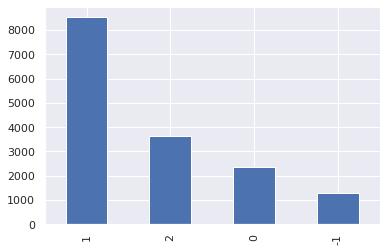

In [21]:
#Sentiment Occurence Count
df_train['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

**Data Cleaning**

In [22]:
#URL Removal
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [23]:
#Lower
df['message'] = df['message'].str.lower()

In [24]:
#Remove Punctuation
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [25]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [26]:
df['message'] = df['message'].apply(remove_punctuation)
df['message'].iloc[4]

'rt soynoviodetodas its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight'

**TokenIzation**

In [27]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [28]:
tokeniser = TreebankWordTokenizer()
df['tokens'] = df['message'].apply(tokeniser.tokenize)

In [29]:
df['tokens'].iloc[4]

['rt',
 'soynoviodetodas',
 'its',
 '2016',
 'and',
 'a',
 'racist',
 'sexist',
 'climate',
 'change',
 'denying',
 'bigot',
 'is',
 'leading',
 'in',
 'the',
 'polls',
 'electionnight']

In [30]:
#View of token column
df.head()

,sentiment,message,tweetid,tokens
0,1.0,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1.0,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr..."
2,2.0,rt rawstory researchers say we have three year...,698562,"[rt, rawstory, researchers, say, we, have, thr..."
3,1.0,todayinmaker wired 2016 was a pivotal year in...,573736,"[todayinmaker, wired, 2016, was, a, pivotal, y..."
4,1.0,rt soynoviodetodas its 2016 and a racist sexis...,466954,"[rt, soynoviodetodas, its, 2016, and, a, racis..."


**Stemming**

In [31]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

In [32]:
stemmer = SnowballStemmer('english')

In [33]:
def df_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [34]:
df['stem'] = df['tokens'].apply(df_stemmer, args=(stemmer, ))

Print off the results of the stemmer to see what we have done.

In [35]:
for i, t in enumerate(df.iloc[2]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df.iloc[2]['stem'][i]))

rt                   --> rt        
rawstory             --> rawstori  
researchers          --> research  
say                  --> say       
we                   --> we        
have                 --> have      
three                --> three     
years                --> year      
to                   --> to        
act                  --> act       
on                   --> on        
climate              --> climat    
change               --> chang     
before               --> befor     
it                   --> it        
’                    --> ’         
s                    --> s         
too                  --> too       
late                 --> late      
urlweb               --> urlweb    
urlweb…              --> urlweb…   


In [36]:
df.head()

,sentiment,message,tweetid,tokens,stem
0,1.0,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1.0,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge..."
2,2.0,rt rawstory researchers say we have three year...,698562,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstori, research, say, we, have, three,..."
3,1.0,todayinmaker wired 2016 was a pivotal year in...,573736,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmak, wire, 2016, was, a, pivot, year, ..."
4,1.0,rt soynoviodetodas its 2016 and a racist sexis...,466954,"[rt, soynoviodetodas, its, 2016, and, a, racis...","[rt, soynoviodetoda, it, 2016, and, a, racist,..."


**Lemmatization**

A very similar operation to stemming is called lemmatization. Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

In [37]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Let's lemmatize all of the words in the DF dataframe.

In [38]:
def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

In [39]:
df['lemma'] = df['tokens'].apply(df_lemma, args=(lemmatizer, ))

Now we will print out the results of the lemmatization to see what we have done.

In [40]:
for i, t in enumerate(df.iloc[2]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df.iloc[2]['lemma'][i]))

rt                   --> rt        
rawstory             --> rawstory  
researchers          --> researcher
say                  --> say       
we                   --> we        
have                 --> have      
three                --> three     
years                --> year      
to                   --> to        
act                  --> act       
on                   --> on        
climate              --> climate   
change               --> change    
before               --> before    
it                   --> it        
’                    --> ’         
s                    --> s         
too                  --> too       
late                 --> late      
urlweb               --> urlweb    
urlweb…              --> urlweb…   


In [41]:
df.head()

,sentiment,message,tweetid,tokens,stem,lemma
0,1.0,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1.0,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evidence, of, anthro..."
2,2.0,rt rawstory researchers say we have three year...,698562,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstori, research, say, we, have, three,...","[rt, rawstory, researcher, say, we, have, thre..."
3,1.0,todayinmaker wired 2016 was a pivotal year in...,573736,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmak, wire, 2016, was, a, pivot, year, ...","[todayinmaker, wired, 2016, wa, a, pivotal, ye..."
4,1.0,rt soynoviodetodas its 2016 and a racist sexis...,466954,"[rt, soynoviodetodas, its, 2016, and, a, racis...","[rt, soynoviodetoda, it, 2016, and, a, racist,...","[rt, soynoviodetodas, it, 2016, and, a, racist..."


**Stop Words**

Stop words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information.

In [42]:
from nltk.corpus import stopwords

In [43]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [44]:
nltk.download(['punkt','stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
df['stem'] = df['tokens'].apply(remove_stop_words)

In [46]:
df.head()

,sentiment,message,tweetid,tokens,stem,lemma
0,1.0,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1.0,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[like, lack, evidence, anthropogenic, global, ...","[it, not, like, we, lack, evidence, of, anthro..."
2,2.0,rt rawstory researchers say we have three year...,698562,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstory, researchers, say, three, years,...","[rt, rawstory, researcher, say, we, have, thre..."
3,1.0,todayinmaker wired 2016 was a pivotal year in...,573736,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmaker, wired, 2016, pivotal, year, war...","[todayinmaker, wired, 2016, wa, a, pivotal, ye..."
4,1.0,rt soynoviodetodas its 2016 and a racist sexis...,466954,"[rt, soynoviodetodas, its, 2016, and, a, racis...","[rt, soynoviodetodas, 2016, racist, sexist, cl...","[rt, soynoviodetodas, it, 2016, and, a, racist..."


**Text Feature Extraction**

*Bag of Words*

In [47]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [48]:
type_labels = list(df_train.sentiment.unique())
print(type_labels)

[1, 2, 0, -1]


In [52]:
outcome = {}
for pp in type_labels:
    df_train = df_train.groupby('sentiment')
    outcome[pp] = {}
    for row in df_train.get_group(pp)['message']:
        outcome[pp] = bag_of_words_count(row, outcome[pp])  

AttributeError: ignored